In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
def compute_pca(X, n_components=2):
    """
    Input:
        X: of dimension (m,n) where each row corresponds to a word vector
        n_components: Number of components you want to keep.
    Output:
        X_reduced: Data transformed in n_components dimensions
    """

    # StandardScaling
    X_demeaned = StandardScaler(with_std=True).fit_transform(X)
    print("Matrix X After Adjusting values to Standard scale:- \n",X_demeaned[:10])
    
    # calculating the covariance matrix
    covariance_matrix = np.cov(X_demeaned, rowvar=False)
    print("\nCovariance matrix:-\n",covariance_matrix)
    # getting eigenvectors & eigenvalues of the covariance matrix
    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix)
    print(f"\nEigenvalues\n{eigen_vals}\n\nEigenvectors\n{eigen_vecs}\n")
    # sort eigenvalue in increasing order (getting the indices from the sort)
    idx_sorted = np.argsort(eigen_vals)
    
    #Decreasing order
    decreasing_index = idx_sorted[::-1]

    # sort eigenvectors using the idx_sorted_decreasing indices
    eigen_vecs_sorted = eigen_vecs[:,decreasing_index]

    # n_components is desired dimension
    # of rescaled data array, or eigen_vecs_sorted
    eigen_vecs_subset = eigen_vecs_sorted[:,:n_components]

    # transform the data by multiplying the transpose of the eigenvectors 
    # with the transpose of the de-meaned data
    # Then take the transpose of that product.
    X_reduced = np.dot(eigen_vecs_subset.transpose(),X_demeaned.transpose()).transpose()
    return X_reduced

In [4]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
lr = LogisticRegression(random_state=0)

X_reduced_dimension = compute_pca(X, n_components=2)
print("Matrix X After number of features reduced to 2:-\n",X_reduced_dimension)

X_train, X_test, y_train, y_test = train_test_split(X_reduced_dimension, y, test_size=0.2)

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print(classification_report(y_test,y_pred)) #We are getting accuracy between 95% to 100%

Matrix X After Adjusting values to Standard scale:- 
 [[-1.21394365  1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522
   0.80899739  1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728
   1.84791957]
 [-1.21394365  0.24628963 -0.49941338 -0.82799632 -2.49084714  0.01814502
   0.56864766  0.73362894 -0.82071924 -0.54472099 -0.29332133  0.40605066
   1.1134493 ]
 [-1.21394365  0.19687903  0.02123125  1.10933436 -0.2687382   0.08835836
   0.80899739  1.21553297 -0.49840699  2.13596773  0.26901965  0.31830389
   0.78858745]
 [-1.21394365  1.69154964 -0.34681064  0.4879264  -0.80925118  0.93091845
   2.49144552  1.46652465 -0.98187536  1.03215473  1.18606801 -0.42754369
   1.18407144]
 [-1.21394365  0.29570023  0.22769377  1.84040254  0.45194578  1.28198515
   0.80899739  0.66335127  0.22679555  0.40140444 -0.31927553  0.36217728
   0.44960118]
 [-1.21394365  1.48155459 -0.51736664  0.30515936 -1.28970717  0.86070511
   1.56209322  1.36612798 -0.17609475  0.66421706  0.7318

c:\Users\brook\OneDrive\Desktop\DataVisualizationProjects\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\brook\OneDrive\Desktop\DataVisualizationProjects\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\brook\OneDrive\Desktop\DataVisualizationProjects\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _w

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [7]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [8]:
lr = LogisticRegression(random_state=0)

pca = PCA(n_components=2)

X_demeaned = StandardScaler(with_std=True).fit_transform(X)
X_reduced_dimension = pca.fit_transform(X_demeaned)

X_train, X_test, y_train, y_test = train_test_split(X_reduced_dimension, y, test_size=0.2)

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print(classification_report(y_test,y_pred)) #We are getting accuracy between 95% to 100%

              precision    recall  f1-score   support

         312       0.00      0.00      0.00       1.0
         325       0.00      0.00      0.00       1.0
         355       0.00      0.00      0.00       1.0
         365       0.00      0.00      0.00       1.0
         372       0.00      0.00      0.00       1.0
         378       0.00      0.00      0.00       1.0
         392       0.00      0.00      0.00       1.0
         406       0.00      0.00      0.00       1.0
         415       0.00      0.00      0.00       1.0
         450       0.00      0.00      0.00       1.0
         463       0.00      0.00      0.00       1.0
         465       0.00      0.00      0.00       1.0
         480       0.00      0.00      0.00       0.0
         495       0.00      0.00      0.00       1.0
         500       0.00      0.00      0.00       1.0
         502       0.00      0.00      0.00       1.0
         510       0.00      0.00      0.00       0.0
         515       0.00    

c:\Users\brook\OneDrive\Desktop\DataVisualizationProjects\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\brook\OneDrive\Desktop\DataVisualizationProjects\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\brook\OneDrive\Desktop\DataVisualizationProjects\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _w

In [9]:
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(45, 45))

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np

# Sample text data
corpus = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

# Create TF-IDF vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X.toarray())

# Print the reduced data
print(principal_components)

[[ 0.30315254  0.26940508]
 [ 0.24254257 -0.56873279]
 [-0.84884764  0.02992263]
 [ 0.30315254  0.26940508]]


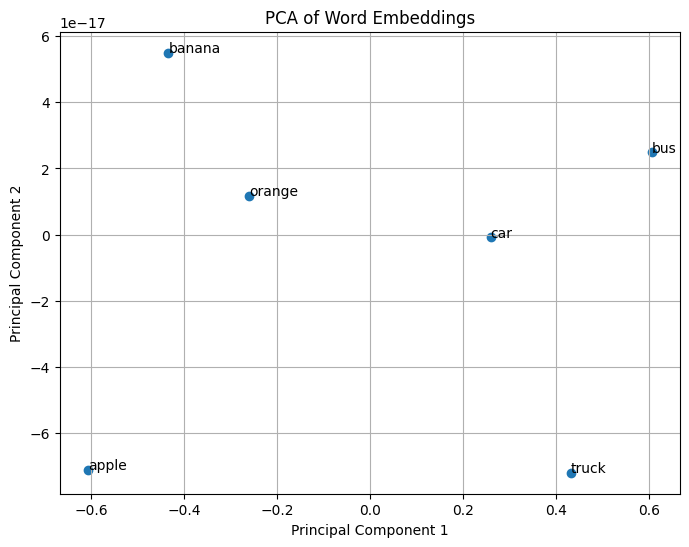

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Sample word embeddings (replace with actual embeddings)
word_embeddings = {
    "apple": [0.1, 0.2, 0.3],
    "banana": [0.2, 0.3, 0.4],
    "orange": [0.3, 0.4, 0.5],
    "car": [0.6, 0.7, 0.8],
    "truck": [0.7, 0.8, 0.9],
    "bus": [0.8, 0.9, 1.0]
}

words = list(word_embeddings.keys())
vectors = np.array(list(word_embeddings.values()))

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(vectors)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])

# Annotate points with words
for i, word in enumerate(words):
    plt.annotate(word, xy=(principal_components[i, 0], principal_components[i, 1]))

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Word Embeddings")
plt.grid(True)
plt.show()